In [1]:
!pip install imblearn

You should consider upgrading via the '/Users/femitemiola/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:

# Load the data for analysis
# import all the dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot appears inside the notebook

%matplotlib inline

# import models from Sckit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# This is the algorithms used to reduce classimbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE)
from imblearn.ensemble import (BalancedBaggingClassifier, BalancedRandomForestClassifier, RUSBoostClassifier, EasyEnsembleClassifier)


# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score


lucene = pd.read_excel("lucene.xlsx")
lucene

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,lucene,2.4,org.apache.lucene.index.DocInverterPerThread,5,2,0,19,18,0,8,...,0.000000,7,0.500000,0.400000,0,0,14.400000,3,1.2000,1
1,lucene,2.4,org.apache.lucene.search.FuzzyQuery,10,3,0,13,41,7,1,...,0.500000,0,0.720000,0.285714,2,6,27.200000,6,1.4000,1
2,lucene,2.4,org.apache.lucene.search.QueryTermVector,10,1,0,4,38,0,0,...,1.000000,0,0.000000,0.340000,0,0,27.500000,5,1.6000,0
3,lucene,2.4,org.apache.lucene.index.ReadOnlySegmentReader,4,4,0,3,7,6,2,...,0.000000,0,0.981250,0.500000,2,3,5.500000,3,1.2500,0
4,lucene,2.4,org.apache.lucene.index.DirectoryIndexReader,25,2,2,20,82,160,5,...,0.833333,5,0.768421,0.197917,2,8,22.360000,3,1.0800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,lucene,2.4,org.apache.lucene.analysis.StopFilter,13,3,0,6,29,38,2,...,0.600000,1,0.466667,0.285714,1,2,12.307692,1,0.6154,1
336,lucene,2.4,org.apache.lucene.util.ScorerDocQueue,16,1,0,3,24,0,2,...,1.000000,2,0.000000,0.328125,0,0,21.312500,7,1.7500,1
337,lucene,2.4,org.apache.lucene.search.DefaultSimilarity,7,2,0,3,10,21,3,...,0.000000,0,0.714286,0.500000,1,2,6.714286,1,0.8571,0
338,lucene,2.4,org.apache.lucene.index.TermsHashPerThread,10,2,0,24,37,7,9,...,0.000000,8,0.333333,0.188889,0,0,25.400000,4,1.4000,0


In [3]:
# Renaming as
luc_X = lucene.drop(columns=["name.1","name","version"] ,axis=1)
luc_X = luc_X.drop("bug", axis=1)
luc_X


,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,5,2,0,19,18,0,8,15,4,0.785714,84,0.000000,7,0.500000,0.400000,0,0,14.400000,3,1.2000
1,10,3,0,13,41,7,1,12,9,0.638889,286,0.500000,0,0.720000,0.285714,2,6,27.200000,6,1.4000
2,10,1,0,4,38,0,0,4,9,0.388889,287,1.000000,0,0.000000,0.340000,0,0,27.500000,5,1.6000
3,4,4,0,3,7,6,2,2,1,2.000000,26,0.000000,0,0.981250,0.500000,2,3,5.500000,3,1.2500
4,25,2,2,20,82,160,5,18,8,0.881944,596,0.833333,5,0.768421,0.197917,2,8,22.360000,3,1.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,13,3,0,6,29,38,2,4,11,0.716667,178,0.600000,1,0.466667,0.285714,1,2,12.307692,1,0.6154
336,16,1,0,3,24,0,2,2,12,0.383333,361,1.000000,2,0.000000,0.328125,0,0,21.312500,7,1.7500
337,7,2,0,3,10,21,3,1,7,2.000000,54,0.000000,0,0.714286,0.500000,1,2,6.714286,1,0.8571
338,10,2,0,24,37,7,9,18,4,0.759259,276,0.000000,8,0.333333,0.188889,0,0,25.400000,4,1.4000


In [4]:
luc_y = lucene["bug"]
luc_y

0      1
1      1
2      0
3      0
4      1
      ..
335    1
336    1
337    0
338    0
339    1
Name: bug, Length: 340, dtype: int64

In [5]:
# imbalanced target for the Test_dataset(2.2) using cost-sensitive
lucy = lucene["bug"]
lucy_imbal = lucy.value_counts()/len(lucene)
lucy_imbal

1    0.597059
0    0.402941
Name: bug, dtype: float64

In [6]:
lucene2 = pd.read_excel("lunce_2.xls")
lucene2

,name,version,name33,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,lucene,2.2,org.apache.lucene.search.FuzzyQuery,10,3,0,13,42,7,1,...,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000,1
1,lucene,2.2,org.apache.lucene.index.MultiLevelSkipListReader,10,1,1,4,21,0,1,...,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000,1
2,lucene,2.2,org.apache.lucene.store.RAMDirectory,17,2,0,11,42,0,2,...,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824,1
3,lucene,2.2,org.apache.lucene.search.spans.SpanQuery,5,2,5,17,7,10,12,...,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000,0
4,lucene,2.2,org.apache.lucene.index.TermPositions,4,1,0,23,4,6,22,...,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,lucene,2.2,org.apache.lucene.search.Explanation,13,1,1,41,21,64,41,...,1.000000,0,0.000000,0.292308,0,0,13.923077,4,1.4615,0
243,lucene,2.2,org.apache.lucene.index.FieldReaderException,4,4,0,1,8,6,1,...,0.000000,0,1.000000,0.666667,0,0,4.000000,0,0.0000,0
244,lucene,2.2,org.apache.lucene.index.FieldInfo,1,1,0,8,2,0,8,...,0.000000,0,0.000000,1.000000,0,0,27.000000,0,0.0000,1
245,lucene,2.2,org.apache.lucene.search.HitIterator,5,1,0,2,10,0,1,...,1.000000,1,0.000000,0.600000,0,0,10.600000,2,1.2000,1


In [7]:
luc_X = lucene.drop(columns=["name.1","name","version","bug"] ,axis=1)
Xtrain = luc_X.iloc[:, :-1].values
# Xtrain = luc_X
Xtrain

array([[ 5.        ,  2.        ,  0.        , ...,  0.        ,
        14.4       ,  3.        ],
       [10.        ,  3.        ,  0.        , ...,  6.        ,
        27.2       ,  6.        ],
       [10.        ,  1.        ,  0.        , ...,  0.        ,
        27.5       ,  5.        ],
       ...,
       [ 7.        ,  2.        ,  0.        , ...,  2.        ,
         6.71428571,  1.        ],
       [10.        ,  2.        ,  0.        , ...,  0.        ,
        25.4       ,  4.        ],
       [ 3.        ,  4.        ,  0.        , ...,  2.        ,
         6.33333333,  1.        ]])

In [8]:
# turning the dataset to an array
luc_y = lucene["bug"]
a = luc_y.iloc[:].values
ytrain = a
# ytrain = luc_y 
ytrain

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [9]:
# # feature scaling
# scaler = MinMaxScaler()
# Xtrain = scaler.fit_transform(Xtrain)
# Xtrain = scaler.transform(Xtrain)
Xtrain.shape

(340, 19)

In [10]:
ytrain.shape

(340,)

In [11]:
# this is the X DATA for lucence2.2
lucX = lucene2.drop(columns=["name33","name","version","bug"] ,axis=1)
lucX

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,10,3,0,13,42,7,1,12,9,0.638889,280,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000
1,10,1,1,4,21,0,1,3,1,0.619048,477,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000
2,17,2,0,11,42,0,2,10,15,0.562500,393,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824
3,5,2,5,17,7,10,12,6,4,2.000000,14,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000
4,4,1,0,23,4,6,22,1,4,2.000000,4,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,13,1,1,41,21,64,41,0,11,0.611111,197,1.000000,0,0.000000,0.292308,0,0,13.923077,4,1.4615
243,4,4,0,1,8,6,1,0,4,2.000000,20,0.000000,0,1.000000,0.666667,0,0,4.000000,0,0.0000
244,1,1,0,8,2,0,8,0,0,2.000000,36,0.000000,0,0.000000,1.000000,0,0,27.000000,0,0.0000
245,5,1,0,2,10,0,1,2,4,0.375000,60,1.000000,1,0.000000,0.600000,0,0,10.600000,2,1.2000


In [12]:
# imbalanced target for the Test_dataset(2.2) using cost-sensitive
lucy = lucene2["bug"]
luc_ymbal = lucy.value_counts()/len(lucene2)
luc_ymbal

1    0.582996
0    0.417004
Name: bug, dtype: float64

In [13]:
# # this is the testset for lucence2.2
Xtest = lucX.iloc[:, :-1].values
xtest = Xtest
# # feature scaling
# # scaler = MinMaxScaler()
# # scaler.fit_transform(Xtest)
# # xtest = scaler.transform(Xtest)
xtest.shape

(247, 19)

In [14]:
# turning the dataset to an array
lucy = lucene2["bug"]
a = lucy.iloc[:].values
ytest = a
ytest
# lucy


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1])

In [15]:
# This is used to resize the data set since (240 values were found) instead of 340
# ytests= np.array([lucy], order='C')
ytests= np.array([ytest], order='C')
ytests.resize((340,19))
ytests.shape

(340, 19)

In [16]:
# # turning the dataset to an array
b = lucX.iloc[:].values
xtest = b
xtest

array([[10.        ,  3.        ,  0.        , ..., 26.6       ,
         6.        ,  1.4       ],
       [10.        ,  1.        ,  1.        , ..., 45.3       ,
         2.        ,  1.        ],
       [17.        ,  2.        ,  0.        , ..., 21.94117647,
         2.        ,  0.8824    ],
       ...,
       [ 1.        ,  1.        ,  0.        , ..., 27.        ,
         0.        ,  0.        ],
       [ 5.        ,  1.        ,  0.        , ..., 10.6       ,
         2.        ,  1.2       ],
       [21.        ,  2.        ,  0.        , ..., 22.95238095,
         6.        ,  1.6667    ]])

In [17]:
x_test = np.array([xtest], order='C')
x_test.resize((340,19))
x_test.shape
# x_test = np.array([lucX], order='C')
# x_test.resize((340,19))
# x_test.shape
# x_test = lucX
# x_test.shape

(340, 19)

In [18]:
# This code is used to convert from one-Hotcoder to single-digit ones
import numpy as np
y_test=np.argmax(ytests, axis=1)
y_test[1]
# 2

1

In [19]:
x_test

array([[10.        ,  3.        ,  0.        , ...,  4.        ,
        26.6       ,  6.        ],
       [ 1.4       , 10.        ,  1.        , ...,  0.        ,
         0.        , 45.3       ],
       [ 2.        ,  1.        , 17.        , ...,  0.35294118,
         1.        ,  5.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
#  the data has been been split , we can train our model into 
from sklearn.ensemble import RandomForestClassifier
model = {"RandomForest": RandomForestClassifier(n_estimators=95, 
                                                max_depth=None,
                                                min_samples_leaf=2,
                                                min_samples_split=6,
                                                n_jobs=4
                                                )}

# Create a function to fit and score model
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    This method is used:
    To fit and evaluate a machine learning algorithm RandomForestClassifier.
    X_train: training data (The bug column was removed)
    X_test: It contains the label to be used for testing the model
    y_train: training label of the bug_column
    y_test: test label of the bug_column
    """
    # set the random seed 
    np.random.seed(10)
    model_score = {}
    model_score_train =[]
    for name , model in model.items():
        # Fit the model to the dataset of Ant Software
        model.fit(X_train, y_train)
        a = model.score(X_train, y_train)
        model_score_train.append(a)
        
        #Evaluate the model and append it score to model_score
        
        model_score[name] = model.score(X_test, y_test)
        
        return model_score,model_score_train  
        

In [21]:
fit_and_score(model=model, X_train=Xtrain, X_test=x_test, y_train=ytrain, y_test=y_test)

({'RandomForest': 0.7}, [0.9705882352941176])

In [22]:
# print(classification_report(y_test, x_test))

In [23]:
# just re-sampling methods for the Lucene Dataset

resampling_dict = {
    'random_forest' : RandomUnderSampler(
     sampling_strategy='auto',
     random_state=0,
     replacement=True,
    ),
    'smote' : SMOTE(
     sampling_strategy='auto',
     random_state=200,
     k_neighbors=20,
     n_jobs=4,
    )
}

In [24]:
# using ensemble methods (with/without resampling of lucence 2.4) 2154.4346900318865    0.0037649358067924714
ensemble_dict = {
    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
     max_depth=None,
     min_samples_leaf=2, 
     min_samples_split=6,
     criterion='gini',
     sampling_strategy='auto',
     n_jobs=4,
     n_estimators=20,
     random_state=200,
    ),
    
    # bagging of LR, sampling is implemented
     'bagging_LR': BaggingClassifier(
     base_estimator=LogisticRegression(random_state=200,C=2034.4346900318865,max_iter=100,
                                      solver='lbfgs',tol=0.0037649358067924714),
     n_estimators=20,
     n_jobs=4,
     random_state=200),
    
    # bagging of LR, sampling is implemented
    'balanced_bagging_LR': BalancedBaggingClassifier(
     base_estimator=LogisticRegression(random_state=200,C=2164.4346900318865,max_iter=100,
                                      solver='lbfgs',tol=0.0037649358067924714),
     n_estimators=20,
     max_samples=1.0, # the number of samples to draw from X to train each base estimator
     max_features=1.0,
     bootstrap=True, 
     bootstrap_features=False,
     sampling_strategy='auto',
     n_jobs=4,
     random_state=200),
    # boosting + undersampling
#     'rusboost': RUSBoostClassifier(
#      base_estimator=None,
#      n_estimators=20,
#      learning_rate =1.0),
#      bagging + boosting + under_sampling
    'easyEnsemble': EasyEnsembleClassifier(
     n_estimators=20,    
     n_jobs=4, 
     random_state=200,
     sampling_strategy='auto')
    
    
}


In [25]:
def random_Forests(sam_xtrain, sam_xtest, sam_ytrain, sam_ytest):
    
    rf = RandomForestClassifier(n_estimators=95, 
                                max_depth=None,
                                min_samples_leaf=2,
                                min_samples_split=6,
                                n_jobs=4)
    rf.fit(sam_xtrain, sam_ytrain)
    print('Trainset')
    pred = rf.predict_proba(sam_xtrain)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(sam_ytrain, pred[:, 1],multi_class='ovr')))
    print()
    
    print('Testset')
    pred = rf.predict_proba(sam_xtest)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(sam_ytest, pred[:,1],multi_class='ovr')))
    return roc_auc_score(sam_ytest, pred[:, 1], multi_class='ovr')
    
    

In [26]:
# balance algorithms
def am_ensemble(ensemble,sam_xtrain, sam_xtest, sam_ytrain, sam_ytest):
#     list_preds =[]
    ensemble.fit(sam_xtrain,sam_ytrain)
    ensemble.predict(sam_xtest)
    y_preds = ensemble.predict(sam_xtest)
#     list_preds.append(y_preds)
    print('Train set')
    pred = ensemble.predict_proba(sam_xtrain)
    print('ensembleBoost roc-auc: {}'.format(roc_auc_score(sam_ytrain, pred[:, 1],multi_class='ovr')))
     
    print('Test set')
    pred = ensemble.predict_proba(sam_xtest)
    print('ensembleBoost roc-auc: {}'.format(roc_auc_score(sam_ytest, pred[:, 1],multi_class='ovr')))
    
    return roc_auc_score(sam_ytest, pred[:, 1],multi_class='ovr')

In [27]:
results_dict = {}

def compare_result(sam_xtrain, sam_xtest, sam_ytrain, sam_ytest):
    
    for sampler in resampling_dict.keys():
        print(sampler)
    # resample
        x_resample , y_resample = resampling_dict[sampler].fit_resample(sam_xtrain, sam_ytrain)
    
    #train model and store result
        roc = random_Forests(x_resample, sam_xtest, y_resample, sam_ytest)
        results_dict[sampler] = roc
        print()
    
    
    for ensemble in ensemble_dict.keys():
        print(ensemble)
        # train model and store result
        roc = am_ensemble(ensemble_dict[ensemble],sam_xtrain, sam_xtest, sam_ytrain, sam_ytest)
        results_dict[ensemble] = roc
        print()
        
    return results_dict
    

In [29]:
# compare different ensemble methods
compare_result(sam_xtrain=Xtrain, sam_xtest=x_test, sam_ytrain=ytrain, sam_ytest=y_test)

random_forest
Trainset
Random Forests roc-auc: 0.9995737652512122

Testset
Random Forests roc-auc: 0.6127596439169138

smote
Trainset
Random Forests roc-auc: 0.9992234706010823

Testset
Random Forests roc-auc: 0.5390702274975272

balancedRF
Train set
ensembleBoost roc-auc: 0.98597677178095
Test set
ensembleBoost roc-auc: 0.5588526211671612

bagging_LR
Train set
ensembleBoost roc-auc: 0.7920247384128583
Test set
ensembleBoost roc-auc: 0.7636003956478734

balanced_bagging_LR
Train set
ensembleBoost roc-auc: 0.7890043507964474
Test set
ensembleBoost roc-auc: 0.7546983184965381

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9570313904570135
Test set
ensembleBoost roc-auc: 0.4490603363006924



{'random_forest': 0.6127596439169138,
 'smote': 0.5390702274975272,
 'balancedRF': 0.5588526211671612,
 'bagging_LR': 0.7636003956478734,
 'balanced_bagging_LR': 0.7546983184965381,
 'easyEnsemble': 0.4490603363006924}

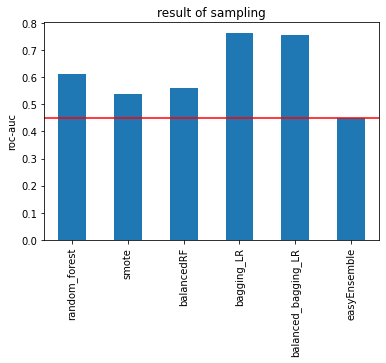

In [30]:
pd.Series(results_dict).plot.bar()
plt.title("result of sampling")
plt.ylabel('roc-auc')
plt.axhline(results_dict['easyEnsemble'], color='r')
plt.show()

In [31]:
# print(classification_report(y_test, x_test))

In [32]:
# accuracy_score(y_true, np.round(abs(y_pred)), normalize=False) 

In [33]:
# 734 2 #749